<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_Deep_Learning_Con_TernsorFlow_Machine-Learning_e_IA-/blob/master/scripts/tema04/03-deming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión de la distancia ortogonal

In [0]:
!pip install tensorflow==1.14

$$y = mx +n $$
Dado $(x_0,y_0)$, se define la distancia entre el punto y la recta anterior como:
$$d=\frac{|y_0-(mx_0+b)|}{\sqrt{m^2+1}}$$

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

session = tf.Session()
iris = datasets.load_iris()

In [0]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [0]:
batch_size = 50
learning_rate = 0.1

In [0]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
m = tf.Variable(tf.random_normal(shape=[1,1]))
n = tf.Variable(tf.random_normal(shape=[1,1]))

In [0]:
y_predict = tf.add(tf.matmul(x_data, m), n)

In [0]:
deming_num = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data,m), n)))
demin_den = tf.sqrt(tf.add(tf.square(m), 1.0))
deming_loss = tf.reduce_mean(tf.truediv(deming_num, demin_den))# FUNCION DE PERDIDA

In [0]:
init = tf.global_variables_initializer()
session.run(init)

In [0]:
# DEFINIMOS EL PROCESO DE OPTIMIZACION 
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(deming_loss)

In [25]:
loss_vect = []
for i in range(300):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    temp_loss = session.run(deming_loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    if(i+1)%20==0:
        print("Paso #"+str(i+1)+", m = "+str(session.run(m))+", n = "+str(session.run(n))+
             "Loss: "+str(temp_loss))

Paso #20, m = [[3.1489341]], n = [[0.10425964]]Loss: 0.6442533
Paso #40, m = [[3.5250723]], n = [[0.37377772]]Loss: 0.5663781
Paso #60, m = [[3.6882799]], n = [[0.52975553]]Loss: 0.4184036
Paso #80, m = [[3.7580798]], n = [[0.63872766]]Loss: 0.51903564
Paso #100, m = [[3.7824023]], n = [[0.716618]]Loss: 0.4778857
Paso #120, m = [[3.7708023]], n = [[0.76579094]]Loss: 0.46234596
Paso #140, m = [[3.7611113]], n = [[0.8212243]]Loss: 0.4957541
Paso #160, m = [[3.72256]], n = [[0.85013556]]Loss: 0.4716008
Paso #180, m = [[3.6845634]], n = [[0.8846524]]Loss: 0.5331465
Paso #200, m = [[3.6658401]], n = [[0.9391781]]Loss: 0.58442694
Paso #220, m = [[3.6527734]], n = [[0.99187654]]Loss: 0.48811573
Paso #240, m = [[3.616627]], n = [[1.0300786]]Loss: 0.52267164
Paso #260, m = [[3.5735276]], n = [[1.0677322]]Loss: 0.4649654
Paso #280, m = [[3.5587938]], n = [[1.1283174]]Loss: 0.52790225
Paso #300, m = [[3.5004485]], n = [[1.1555814]]Loss: 0.45612362


In [26]:
[[slope]] = session.run(m)
[[intercept]] = session.run(n)
print(str(slope)+"x + "+str(intercept))# ECUACION LINEAL

3.5004485x + 1.1555814


In [0]:
best_fit = []
for i in x_vals: 
    best_fit.append(slope * i +intercept)

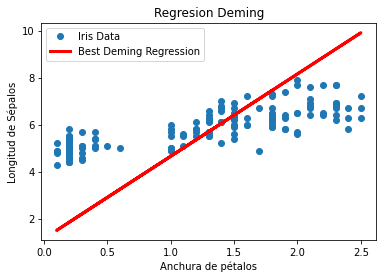

In [28]:
plt.plot(x_vals, y_vals, 'o', label = "Iris Data")
plt.plot(x_vals, best_fit, 'r-', label = "Best Deming Regression", linewidth = 3)
plt.legend(loc = "upper left")
plt.title("Regresion Deming")
plt.xlabel("Anchura de pétalos")
plt.ylabel("Longitud de Sépalos")
plt.show()

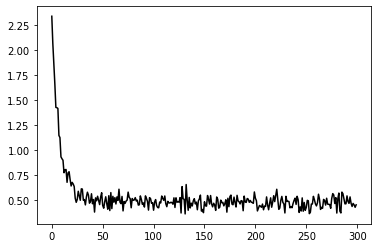

In [29]:
plt.plot(loss_vect, 'k-', label="Función de pérdidas")